## 1.项目背景介绍  

我国白菜种植面积大，2015年，白菜种植面积261.8万公顷，2016年白菜种植面积262.73万公顷。  
大白菜产量大，且多采用大面积种植方案，但由于人力资源及成本问题难以对大规模菜叶一一进行大白菜叶子的健康和潜在感染检测判断。   
随着计算机视觉技术的发展，以及无人化、自动化农田运营理念的提出，利用图像识别技术及目标检测技术实现农产品的自动检测的需求呼之欲出，可通过计算机视觉的方法对菜叶情况进行分析，可以实现早期病害预警，减少人力资源成本以及降低财产损失。  

![](https://ai-studio-static-online.cdn.bcebos.com/70b4e5785ed04fb686f8645edab87144db0cb961e5ce4ff0aac063e88700e011)  
本项目基于PaddleX，并使用MobileNetV2网络进行训练。

## 2.数据介绍  

### 2.1 数据集介绍  

该项目包含两份数据集。  
其中[大白菜病害数据集](https://aistudio.baidu.com/aistudio/datasetdetail/107285)为母体，该数据集包含大白菜叶子的健康和潜在感染图片，目的是将其用于由拉古纳马来亚大学学生进行的有关机器学习和疾病检测的本科论文研究。参与的学生是 Giane Apuada、JanPeter Virtucio 和 Dante Parra。
数据由训练数据集和测试数据集组成。训练 csv 数据集已被标记为包含疾病类别，例如背蛾、潜叶虫和霉菌。相应的图像也已正确命名以正确反映它们所包含的疾病类别。如果它们接触 x 种疾病，那么它们将在数据集上标记为“1”。否则标记为“0”。  
而[白菜数据集](https://aistudio.baidu.com/aistudio/datasetdetail/129132)为以大白菜数据集为母体，经过加工分割出训练集，测试集等产生的子训练集。

### 2.2 数据集处理 

使用PaddleX进行训练对数据集的划分和格式具有一定要求，需要进行预处理，在这里我将母体数据集直接导入PaddleX的可视化模型训练客户端（由于我的python语言水平比较差），再将其自动处理好的数据打包成数据集子体上传。
下图为自动生成的数据：![](https://ai-studio-static-online.cdn.bcebos.com/08a1d17570774e0e863ca362267c4ed658432b7a159244c19351e8249a1f20c6)


### 2.3 数据集展示  
展示数据集中图像的数量，类别，以及随机一张图像。

In [1]:
!unzip 'data/data129132/baicai.zip' -d 'work'      #解压数据库
!tree 'work' -d                                    #列出目录结构

Archive:  data/data129132/baicai.zip
replace work/backmoth/Backmoth1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C
work
├── backmoth
├── leafminer
└── mildew

3 directories


训练集图片数量: 2016
测试集图片数量: 347
验证集图片数量: 575


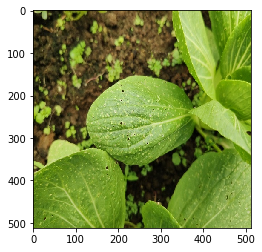

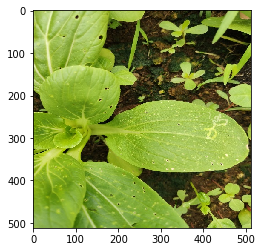

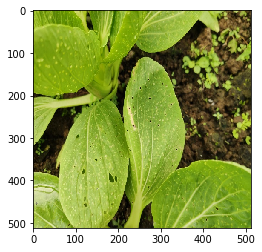

In [8]:
import cv2    #导入库
import numpy as np 
import matplotlib.pylab as plt

with open("work/train_list.txt", "r") as trainList: 
    trainDatas = trainList.readlines()
    print('训练集图片数量: {}'.format(len(trainDatas)))

with open("work/test_list.txt", "r") as testList: 
    testDatas = testList.readlines()
    print('测试集图片数量: {}'.format(len(testDatas)))

with open("work/val_list.txt", "r") as valList: 
    valDatas = valList.readlines()
    print('验证集图片数量: {}'.format(len(valDatas)))

# 从三种病害种类中各抽取一张图像进行可视化
img1_bgr = cv2.imread('work/backmoth/Backmoth1729.jpg')    #读取图像（opencv读取的图像格式为BGR）
img2_bgr = cv2.imread('work/leafminer/Leafminer58.jpg')
img3_bgr = cv2.imread('work/mildew/Mildew126.jpg')

img1_rgb = cv2.cvtColor(img1_bgr,cv2.COLOR_BGR2RGB)         #将BGR格式转换为RGB格式
img2_rgb = cv2.cvtColor(img2_bgr,cv2.COLOR_BGR2RGB)
img3_rgb = cv2.cvtColor(img3_bgr,cv2.COLOR_BGR2RGB)
plt.imshow(img1_rgb)          #根据数组绘制图像
plt.show()                    #显示图像
plt.imshow(img2_rgb)
plt.show()
plt.imshow(img3_rgb)
plt.show()               



## 3.模型介绍  
MobileNetV2是一个图像分类模型。  
（参考论文[ "MobileNetV2: Inverted Residuals and Linear Bottlenecks" ](https://arxiv.org/abs/1801.04381)）  
MobileNetV2 架构基于倒置残差结构，其中残差块的输入和输出是与传统残差模型相反的薄瓶颈层，后者在输入中使用扩展表示，而 MobileNetV2 使用轻量级深度卷积来过滤中间扩展层中的特征。  
MobileNetV2能更好地匹配移动和嵌入式设备，符合将来部署在移动端的需求。  
![](https://ai-studio-static-online.cdn.bcebos.com/ea477df3a6394374bb38c06c7475aab0d62513adba9c48d0b50b045b08bef0a0)



## 4.模型训练

### 4.1 安装PaddleX

In [9]:
! pip install paddlex==2.0.0
#安装PaddleX

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
You should consider upgrading via the '/opt/conda/envs/python35-paddle120-env/bin/python -m pip install --upgrade pip' command.


### 4.2 配置GPU  

In [10]:
#设置使用0号GPU卡（如无GPU，执行此代码后仍然会使用CPU训练模型）
import matplotlib
matplotlib.use('Agg') 
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import paddlex as pdx


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://matplotlib_inline.backend_inline' by the following code:
  File "/opt/conda/envs/python35-paddle120-env/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/opt/conda/envs/python35-paddle120-env/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start()
  File "/opt/conda/env

### 4.3 定义数据处理流程

In [11]:
from paddlex import transforms as T

train_transforms = T.Compose(
    [T.RandomCrop(crop_size=224), T.RandomHorizontalFlip(), T.Normalize()])
#RandomCrop：剪裁图像并调整剪裁后的图像的大小到crop_size*crop_size
#RandomHorizontalFlip：以一定的概率对图像进行随机水平翻转
eval_transforms = T.Compose([
    T.ResizeByShort(short_size=256), T.CenterCrop(crop_size=224), T.Normalize()
])


### 4.4 定义数据集

In [12]:
#采用pdx.datasets.ImageNet来加载数据集
train_dataset = pdx.datasets.ImageNet(
    data_dir='work',
    file_list='work/train_list.txt',
    label_list='work/labels.txt',
    transforms=train_transforms,
    shuffle=True)
eval_dataset = pdx.datasets.ImageNet(
    data_dir='work',
    file_list='work/val_list.txt',
    label_list='work/labels.txt',
    transforms=eval_transforms)
    

2022-02-25 01:54:37 [INFO]	Starting to read file list from dataset...
2022-02-25 01:54:37 [INFO]	2016 samples in file work/train_list.txt
2022-02-25 01:54:37 [INFO]	Starting to read file list from dataset...
2022-02-25 01:54:37 [INFO]	575 samples in file work/val_list.txt


### 4.5 开始训练

In [13]:
num_classes = len(train_dataset.labels)
model = pdx.cls.MobileNetV2(num_classes=num_classes)
model.train(num_epochs=10,                #模型训练迭代的总轮数为10
            train_dataset=train_dataset,  #设置训练集
            train_batch_size=32,          #样本数量为32
            eval_dataset=eval_dataset,    #设置测试集
            lr_decay_epochs=[4, 6, 8], #学习率在第4个epoch时衰减一次，第6个epoch时再衰减一次，第8个epoch时再衰减一次
            save_interval_epochs=1,  #每间隔一轮进行评估和保存
            learning_rate=0.025,
            save_dir='output/mobilenetv2',     #保存目录
            use_vdl=True)   #通过VisualDL对训练过程中的指标进行可视化
#模型在训练过程中，会在save_dir下生成vdl_log目录，通过在命令行终端执行以下命令，启动VisualDL。
#visualdl --logdir=output/vdl_log --port=8008
#在浏览器打开 http://0.0.0.0:8008 便可直接查看随训练迭代动态变化的各个指标


2022-02-25 01:54:41 [INFO]	Loading pretrained model from output/mobilenetv2/pretrain/MobileNetV2_pretrained.pdparams
2022-02-25 01:54:42 [WARNING]	[SKIP] Shape of pretrained params out.weight doesn't match.(Pretrained: [1280, 1000], Actual: [1280, 3])
2022-02-25 01:54:42 [WARNING]	[SKIP] Shape of pretrained params out.bias doesn't match.(Pretrained: [1000], Actual: [3])
2022-02-25 01:54:42 [INFO]	There are 265/267 variables loaded into MobileNetV2.
2022-02-25 01:54:43 [INFO]	[TRAIN] Epoch=1/10, Step=10/63, loss=3.835851, acc1=0.343750, acc3=1.000000, lr=0.025000, time_each_step=0.16s, eta=0:1:41
2022-02-25 01:54:45 [INFO]	[TRAIN] Epoch=1/10, Step=20/63, loss=3.211113, acc1=0.656250, acc3=1.000000, lr=0.025000, time_each_step=0.12s, eta=0:1:17
2022-02-25 01:54:46 [INFO]	[TRAIN] Epoch=1/10, Step=30/63, loss=2.855412, acc1=0.437500, acc3=1.000000, lr=0.025000, time_each_step=0.12s, eta=0:1:15
2022-02-25 01:54:47 [INFO]	[TRAIN] Epoch=1/10, Step=40/63, loss=1.292515, acc1=0.406250, acc3=1.0

## 5.模型评估

In [14]:
import paddlex as pdx
model = pdx.load_model('output/mobilenetv2/best_model')
image_name = 'work/backmoth/Backmoth425.jpg'      #从验证集中抽取一张图片进行预测
result = model.predict(image_name)
print("预测结果:", result)      #展示预测结果


2022-02-25 01:56:38 [INFO]	Model[MobileNetV2] loaded.
预测结果: [{'category_id': 0, 'category': 'backmoth', 'score': 0.8371245}]


## 6.总结与升华

本项目基于PaddleX组件进行开发，实现简单，但预测结果的分数一般，还需要进一步的优化数据库，挑选更合适的模型，以求达到更好的效果。

## 7.个人总结

来自东北大学秦皇岛分校机械专业，是个菜鸡，但是也欢迎大家找我交流学习。希望以后在AI方面有更深的研究。  
[这里是我的主页链接](https://aistudio.baidu.com/aistudio/usercenter)